In [1]:
# https://www.kaggle.com/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo?resource=download

In [32]:
import warnings
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
warnings.simplefilter(action='ignore', category=Warning)

In [4]:
athletes = pd.read_excel('./Athletes.xlsx')
coaches = pd.read_excel('./Coaches.xlsx')
gender = pd.read_excel('./EntriesGender.xlsx')
medals = pd.read_excel('./Medals.xlsx')
teams = pd.read_excel('./Teams.xlsx')

In [5]:
medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


## Estimates of Location

In [6]:
# mean
medals["Total"].mean()

11.612903225806452

In [7]:
# weighted mean
np.average(medals["Total"], weights=medals["Gold"])

46.832352941176474

In [8]:
# trimmed mean
trim_mean(medals["Gold"], 0.1)

1.96

In [9]:
# median
medals["Total"].median()

4.0

In [10]:
# weighted median
def weighted_median(df, median_col, weight_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum() / 2.
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]
weighted_median(medals, "Total", "Gold")

40

In [11]:
# percentile
q3 = np.percentile(medals["Total"], 75)
q3

11.0

In [12]:
# quantile is same as percentile and just a fraction
medals["Gold"].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05     0.0
0.25     0.0
0.50     1.0
0.75     3.0
0.95    18.2
Name: Gold, dtype: float64

In [13]:
medals.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


## Estimates of Variability

In [14]:
# variance
from statistics import variance
variance(medals["Gold"])

49.315100514259

In [15]:
# Standard Deviation
from statistics import stdev
stdev(medals["Gold"])

7.022471111671376

In [16]:
# mean absolute deviation
(medals["Gold"] - (medals["Gold"]).mean()).abs().mean()

4.0048560527228565

In [17]:
# median absolute deviation
(medals["Gold"] - (medals["Gold"]).median()).abs().median()

1.0

In [18]:
# IQR
q3, q1 = np.percentile(medals["Gold"], [75, 25])
iqr = q3 - q1
iqr

3.0

## Exploring the Data Distribution

<Axes: >

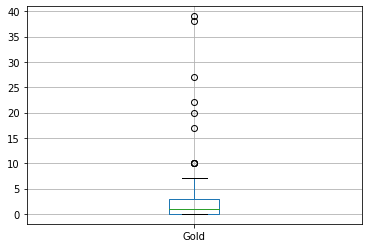

In [19]:
# Box plots
medals.boxplot(column="Gold")

In [20]:
# frequency table
# bin = (max_value - min_value) / no_of bins
# min_val + bin is the first bin 
freq_table = pd.cut(medals['Gold'], 5)
freq_table.value_counts().reset_index()

,Gold,count
0,"(-0.039, 7.8]",83
1,"(7.8, 15.6]",4
2,"(15.6, 23.4]",3
3,"(31.2, 39.0]",2
4,"(23.4, 31.2]",1


Text(0.5, 0, 'Countries')

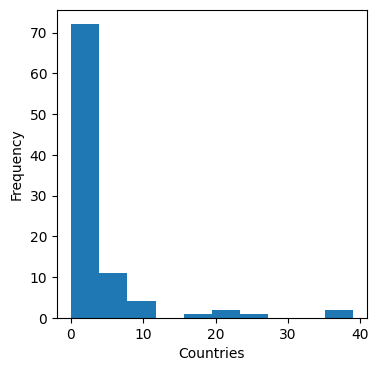

In [21]:
# histogram
ax = (medals['Gold']).plot.hist(figsize=(4,4))
ax.set_xlabel('Countries')

Text(0.5, 0, 'Countries')

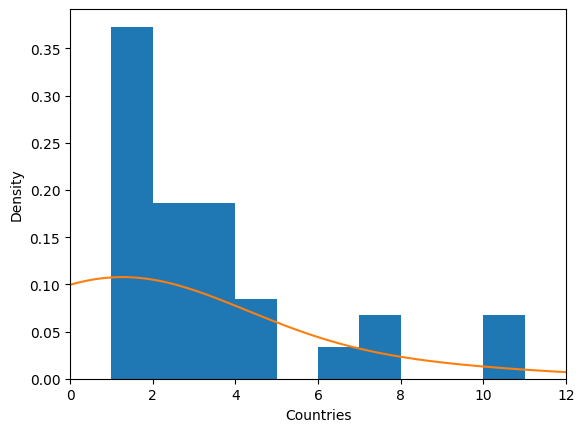

In [22]:
ax = medals['Gold'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
medals['Gold'].plot.density(ax=ax)
ax.set_xlabel('Countries')

## Exploring Categorical Data

In [23]:
# mode
medals["Gold"].mode()

0    0
Name: Gold, dtype: int64

Text(0, 0.5, 'Country')

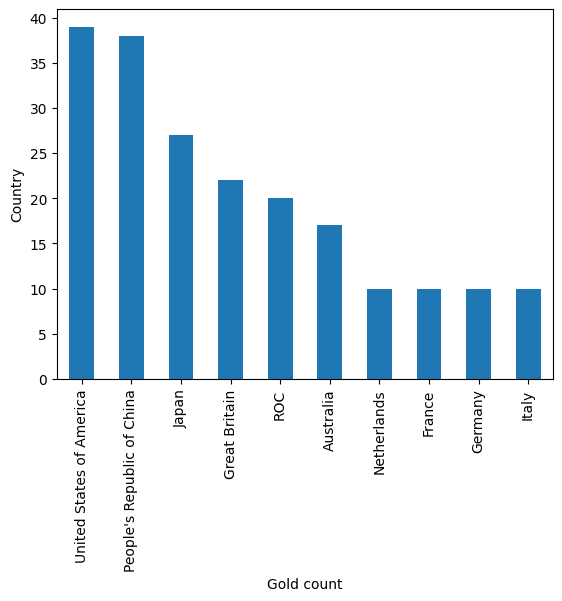

In [24]:
# bar chart
ax = medals.iloc[:10,:].plot.bar(x="Team/NOC", y="Gold", legend=False)
ax.set_xlabel('Gold count')
ax.set_ylabel('Country')

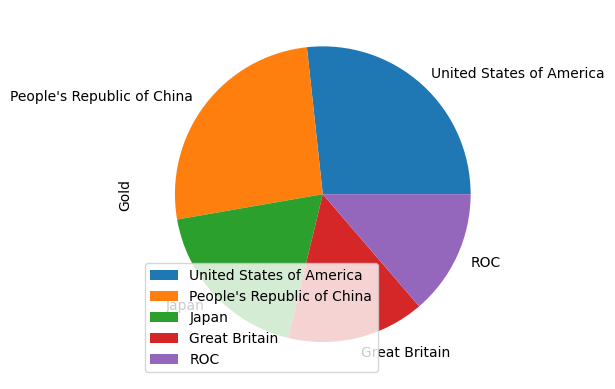

In [25]:
# pie chart
ax = medals.iloc[:5, :].plot.pie(y='Gold', labels=medals['Team/NOC'])

## Correlation

In [26]:
# When gold increases, rank number decreases (goes from 10 → 1). Hence negative correlation
corr = medals.corr(numeric_only=True)
corr

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


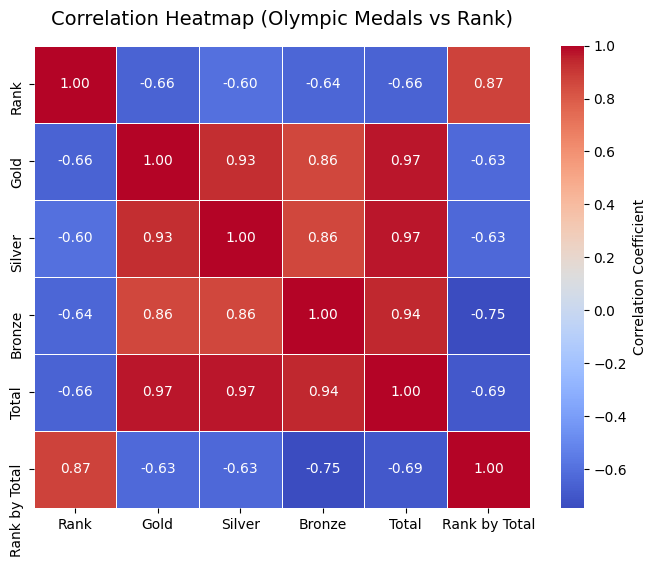

In [27]:
# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,          # show correlation values
    cmap='coolwarm',     # color theme
    fmt=".2f",           # show two decimal places
    linewidths=0.5,      # thin lines between cells
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Heatmap (Olympic Medals vs Rank)', fontsize=14, pad=15)
plt.show()

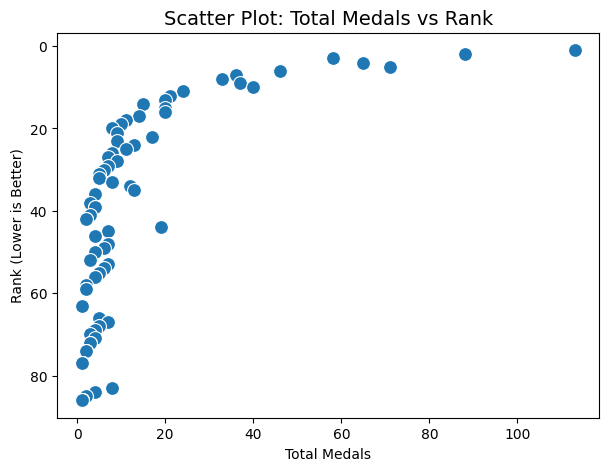

In [28]:
# scatter plot
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=medals,
    x='Total',
    y='Rank',
    s=100,           # size of points
    palette='viridis'
)

plt.title('Scatter Plot: Total Medals vs Rank', fontsize=14)
plt.xlabel('Total Medals')
plt.ylabel('Rank (Lower is Better)')
plt.gca().invert_yaxis()  # because Rank 1 is best
plt.show()

## Exploring two or more variables

<Axes: xlabel='Gold', ylabel='Total'>

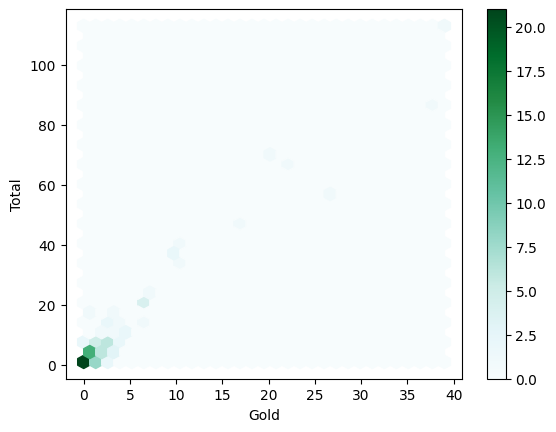

In [33]:
# Hexabinning
medals.plot.hexbin(x='Gold', y='Total', gridsize=30, sharex=False)

<Axes: xlabel='Gold', ylabel='Silver'>

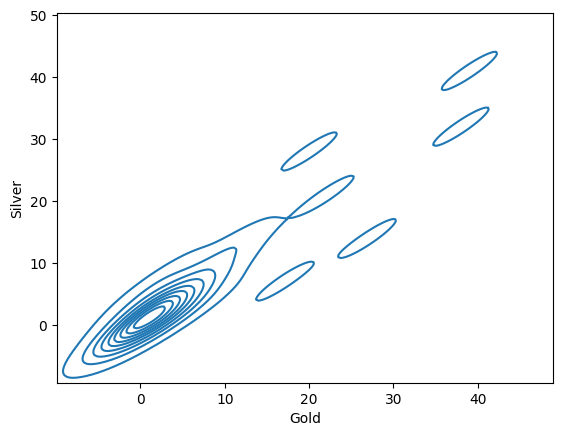

In [34]:
# Contour Plot
sns.kdeplot(medals['Gold'], medals['Silver'])

In [42]:
# Contingency Table
# cell at row 0, column 0 = 11 → 11 countries won 0 Gold and 0 Silver medals.
crosstab = medals[['Silver', 'Gold']].pivot_table(index='Silver', columns='Gold', aggfunc=lambda x: len(x), margins=True, fill_value=0)
crosstab

Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Silver,,,,,,,,,,,,,,,
0,11,7,5,1,0,0,0,0,0,0,0,0,0,0,24
1,12,6,3,4,1,0,0,0,0,0,0,0,0,0,26
2,2,5,1,1,1,0,0,0,0,0,0,0,0,0,10
3,2,3,0,1,0,0,1,0,0,0,0,0,0,0,7
4,1,0,1,2,2,1,0,0,0,0,0,0,0,0,7
5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,2
6,0,1,0,1,0,0,3,0,0,0,0,0,0,0,5
7,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2
8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


<Axes: xlabel='Gold'>

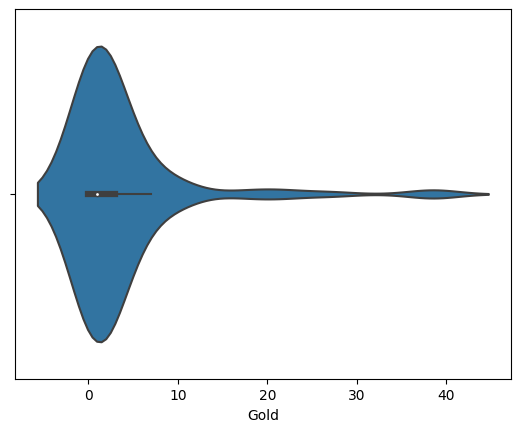

In [51]:
# Violin Plot
sns.violinplot(x=medals['Gold'])

In [52]:
# box plot for 2 variables and hexagonal binning with conditioning/facets